<a href="https://colab.research.google.com/github/utkarshg1/DeepLearning-6th-July/blob/main/Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Classification Project

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Load MNIST dataset

In [2]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

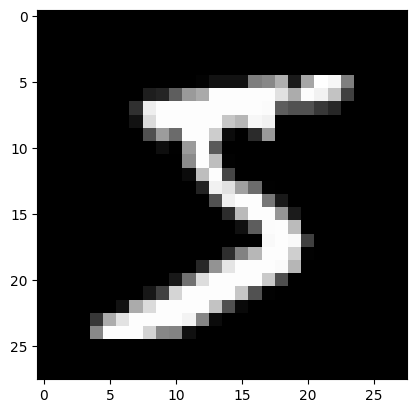

In [6]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap='gray')

In [8]:
xtest.shape

(10000, 28, 28)

In [9]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

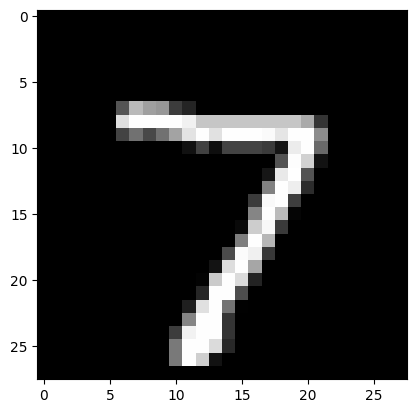

In [10]:
plt.imshow(xtest[0], cmap='gray')

### Displaying first 9 images from train data

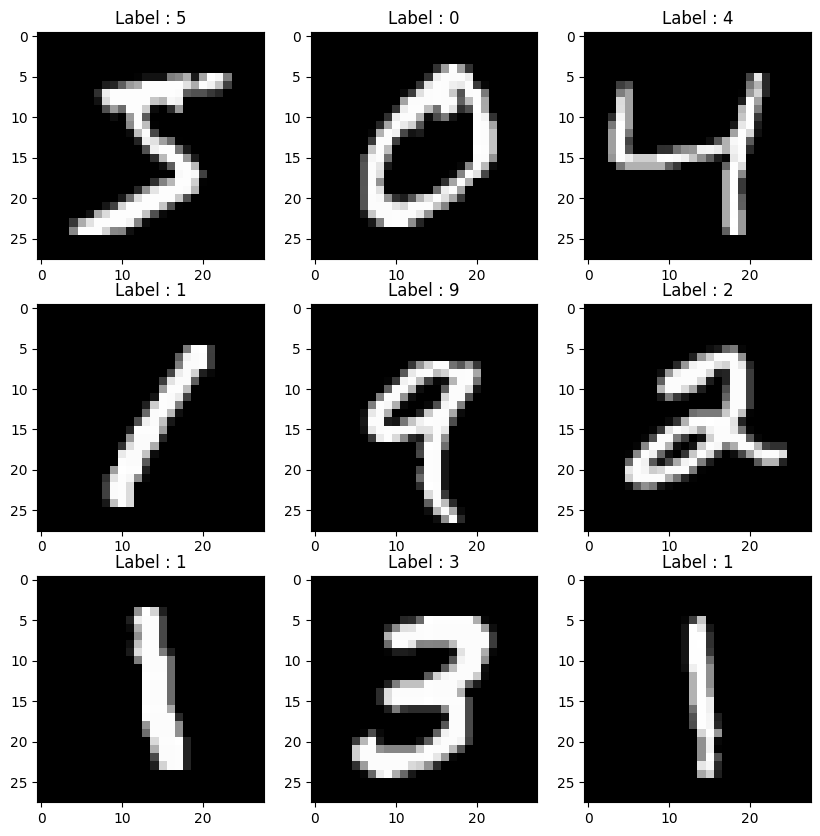

In [13]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(xtrain[i], cmap='gray')
    plt.title(f"Label : {ytrain[i]}")

In [14]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [15]:
len(np.unique(ytrain))

10

### This is a multiclass classification Problem

### Preprocess image data
Pixel value - 0 - 255

In [16]:
xtrain_scl = xtrain.astype("float32")/255
xtest_scl = xtest.astype("float32")/255

In [18]:
xtrain_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Onehot encode the y features

In [19]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [20]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [21]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

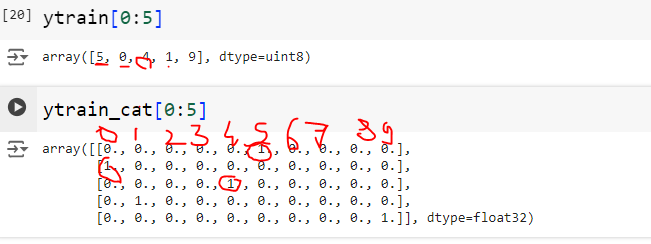

In [22]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [23]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
xtrain.shape

(60000, 28, 28)

### Build the neural network
Simple Covnet architecture

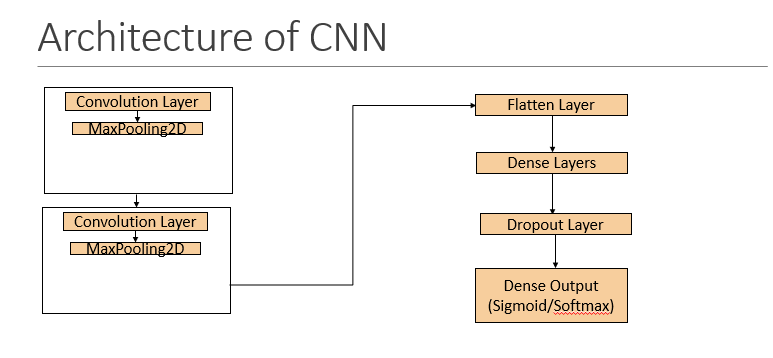

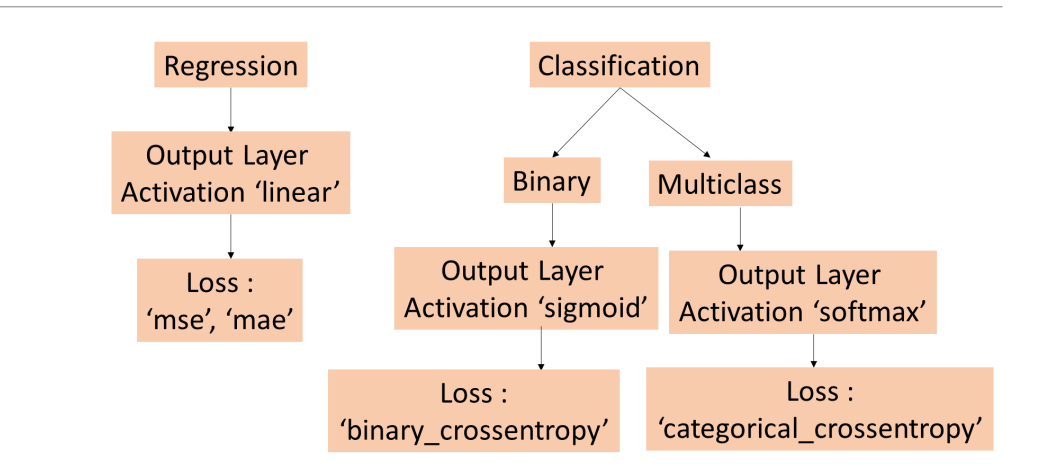

In [24]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [26]:
model = Sequential()

# Added Input layer
model.add(Input(shape=(28, 28, 1)))

# Add Convolution Layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

# Add Max pooling 1
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Convolution Layer2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Add Max pooling 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Flatten Layer
model.add(Flatten())

# Add Dropout Layer
model.add(Dropout(0.5))

# Output layer
model.add(Dense(ytrain_cat.shape[1], activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
hist = model.fit(xtrain_scl, ytrain_cat, epochs=15, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 12s 4ms/step - loss: 0.2232 - accuracy: 0.9310 - val_loss: 0.0601 - val_accuracy: 0.9832
Epoch 2/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0830 - accuracy: 0.9749 - val_loss: 0.0435 - val_accuracy: 0.9873
Epoch 3/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0636 - accuracy: 0.9799 - val_loss: 0.0394 - val_accuracy: 0.9893
Epoch 4/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0566 - accuracy: 0.9826 - val_loss: 0.0360 - val_accuracy: 0.9900
Epoch 5/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0500 - accuracy: 0.9843 - val_loss: 0.0350 - val_accuracy: 0.9900
Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0314 - val_accuracy: 0.9913
Epoch 7/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0420 - accuracy: 0.9868 - val_loss: 0.0291 - val_accuracy

### Plot the learning curve

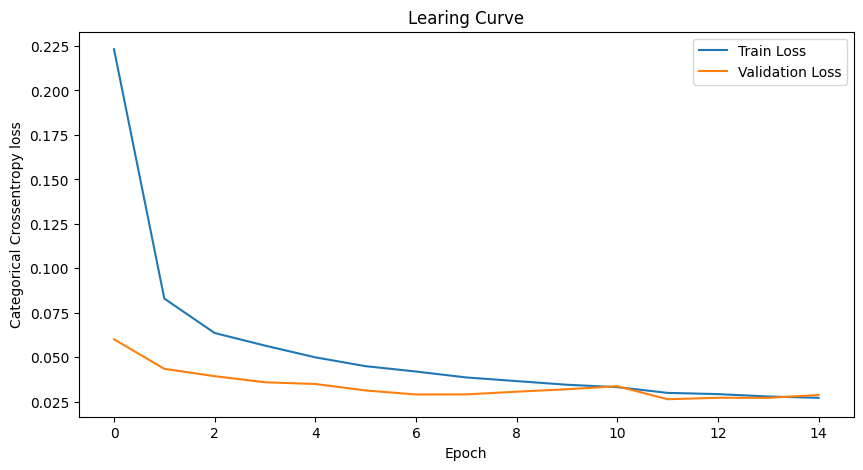

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Learing Curve')
plt.ylabel('Categorical Crossentropy loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Evaluate the model in train and test

In [35]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0106 - accuracy: 0.9971


[0.010644941590726376, 0.997083306312561]

In [36]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.0224 - accuracy: 0.9919


[0.02240055426955223, 0.9919000267982483]

### Predict results for train and test

In [38]:
yprob_train = model.predict(xtrain_scl)
yprob_test = model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [39]:
yprob_train[0:5]

array([[1.10995007e-11, 6.75742448e-13, 2.27256727e-10, 2.00479897e-03,
        4.12583270e-13, 9.97980297e-01, 3.83484564e-12, 7.62365893e-10,
        2.64614619e-06, 1.22090678e-05],
       [9.99999285e-01, 1.83669290e-15, 5.23805909e-07, 1.74504226e-12,
        5.30085198e-10, 7.39361523e-12, 6.17552445e-08, 2.66643114e-11,
        1.79809216e-08, 1.46398506e-07],
       [3.59090978e-15, 3.16146247e-06, 7.59501961e-10, 4.28396929e-10,
        9.99982357e-01, 2.43486842e-10, 3.02689089e-11, 1.39513531e-05,
        3.07496677e-08, 4.02817022e-07],
       [6.57559918e-09, 9.99977946e-01, 1.08816971e-06, 1.31811949e-11,
        8.76319518e-06, 2.85613977e-09, 2.60693895e-07, 1.10194060e-05,
        9.47094975e-07, 1.34570435e-08],
       [5.76684046e-13, 6.74243578e-11, 1.50823964e-10, 1.30043576e-08,
        1.75806981e-05, 1.25421298e-10, 1.23137733e-13, 7.15706733e-07,
        2.12410077e-06, 9.99979496e-01]], dtype=float32)

In [40]:
yprob_test[0:5]

array([[2.7134897e-10, 1.6312650e-12, 7.4783907e-07, 9.7528556e-08,
        1.8909601e-14, 1.1789369e-11, 1.1283788e-19, 9.9999917e-01,
        3.3894793e-10, 2.9421889e-08],
       [5.5300433e-07, 1.8226873e-06, 9.9995029e-01, 4.3211479e-09,
        1.5583748e-11, 3.4065199e-14, 4.7330708e-05, 6.2970887e-12,
        2.0875321e-08, 7.0266657e-12],
       [1.4821430e-08, 9.9995935e-01, 3.1496427e-07, 1.3602484e-09,
        2.8581795e-05, 1.2428283e-07, 2.0317739e-06, 9.3476838e-06,
        2.1884452e-07, 8.6318677e-09],
       [9.9998701e-01, 7.7014560e-14, 3.1097554e-07, 1.4106075e-09,
        4.4559439e-10, 1.5703220e-08, 1.1078630e-05, 2.2818368e-10,
        1.3777201e-06, 1.4325576e-07],
       [7.3397032e-11, 5.5131516e-12, 3.8690356e-11, 3.2981198e-11,
        9.9999499e-01, 6.7028674e-11, 3.6479058e-09, 3.6662888e-11,
        1.0812397e-08, 5.0483141e-06]], dtype=float32)

In [41]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [42]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [43]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [44]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [45]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Plot the confusion Matrix

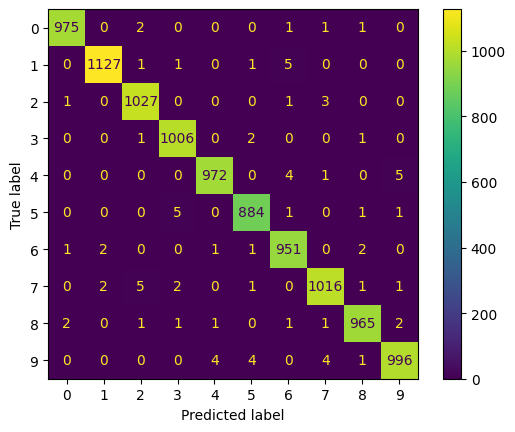

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Save above model for future use

In [48]:
model.save('digit_model.keras')

### Load above model

In [49]:
from keras.models import load_model
nn = load_model('/content/digit_model.keras')
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [50]:
# Loading the image
import cv2
img = cv2.imread('/content/example_img.jpg', cv2.IMREAD_GRAYSCALE)
img

array([[  1,   1,   0,   1,   0,   0,   2,   0,   2,   0,   0,   2,   0,
          0,   2,   1,   1,   0,   0,   0,   3,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   2,   0,   1,   0,   3,   3,   0,   0,
          0,   0,   0,   0,   4,   0,   2,   2,   0,   1,   0,   0,   0,
          0,   0],
       [  1,   2,   1,   1,   0,   0,   4,   0,   0,   0,   0,   0,   2,
          0,   0,   5,   2,   0,   0,   0,   0,   5,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   2,   2,   0,   2,   0,   1,   1,   0,   0,
          1,   0,   0,   0,   6,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   5,   0,  75, 224, 253, 254, 255, 252, 253, 255, 255,
        255, 255, 253, 254, 220, 105,   0,   4,   0,   0,   2,   0,   0,
          0,   0],
       [  2,   0,   0,   3, 221, 253, 255, 255, 255, 255, 255, 255, 253,
        254, 255, 255, 254, 255, 255, 255, 216, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 123, 253, 255, 254, 254, 255, 253, 253, 255,
        255, 252, 253, 255, 255, 255, 254, 255, 254,   0,   1,   0,   0,
          0,   0],
       [  0,   2,   2,   0,   3,   1,   0,   2,   1,   1,   0,   2,   0,
          3,  96, 224, 254, 255, 254, 255, 254, 171,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   2,   0,   0,   0,   0,   0,   0,   1,   0,   0,  95,
        223, 255, 253, 252, 255, 253, 255, 166,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   2,   0,   0, 132, 253,
        253, 255, 255, 255, 255, 165,   8,   4,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,  71, 222, 255, 248, 255,
        255, 253, 169,   8,   0,   0,   6,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   3,   1,   0,   3,   3,  69, 237, 255, 255, 254, 254,
        255, 224,  94,   2,   2,   0,   0,   2,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   1,   0,   1,   1,   0,   0, 225, 254, 251, 255, 253, 255,
        255, 249, 255, 219,  96,   2,   0,   1,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   1,   0,   0,   2,   0, 120, 255, 254, 254, 253, 252,
        255, 255, 254, 255, 243, 103,   0,   0,   5,   0,   3,   0,   0,
          0,   0],
       [  0,   1,   0,   0,   2,   0,   1,   0,   1,   1,   0,   5,   3,
        118, 255, 253, 250, 255, 255, 221,  95,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   4,   0,   1,   0,   1,   0,   0,   3,   0,   3,
          0,   0, 121, 255, 255, 252, 255, 248,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   4,   0,   0,   1,   0,   1,   1,   1,   0,   0,   0,
          2,   0,   1,  10, 155, 255, 255, 250,   3,   1,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   2,   0,   1,   0,   0,   0,   2,   2,   0,
          0,   0,   0,   0,   2, 255, 254, 255,   0,   0,   4,   0,   0,
          0,   0],
       [  0,   3,   2,   0,   1,   2,   3,   0,   1,   0,   0,   1,   0,
          0,   3,   2,   2,   0, 254, 255, 254,   2,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   6,   0,   0,   0,   1,   0,   2,   0,   2,   0,
          3,   0,   0,   0,   1, 254, 255, 252,   3,   0,   2,   0,   0,
          0,   0],
       [  4,   0,   2,   0,   0,   3,  75, 221, 223,  96,   0,   2,   0,
          0,   0,   6,   0, 125, 254, 255, 255,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   5,   1,   0,   0,   1, 216, 255, 255, 243,  98,   0,   2,
          2,   0,  72, 224, 255, 255, 255, 166,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   5,   2,   1, 126, 253, 255, 254, 255, 255, 255,
        255, 255, 255, 255, 255, 253, 183,   9,   1,   0,   0,   0,   0,
          0,   0],
       [  3,   0,   3,   0,   2,   0,   3, 120, 255, 253, 255, 254, 254,
        253, 255, 253, 254, 255, 167,   8,   2,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [51]:
img_scl = img.astype('float32')/255

In [53]:
probs = model.predict(np.array([img_scl]))

1/1 [==============================] - 0s 172ms/step


In [54]:
probs

array([[2.7820649e-21, 1.1373855e-18, 3.9592548e-15, 9.9999917e-01,
        1.7097298e-20, 7.9809860e-07, 1.0870493e-18, 2.8678681e-15,
        2.6274497e-12, 1.8153562e-12]], dtype=float32)

In [56]:
pred = np.argmax(probs)
pred

3

In [57]:
prob = np.max(probs)
prob

0.99999917

In [59]:
def predict_number(path):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap='gray')
  plt.show()
  img_scl = img.astype('float32')/255
  probs = model.predict(np.array([img_scl]))
  pred = np.argmax(probs)
  prob = np.max(probs)
  return pred, prob

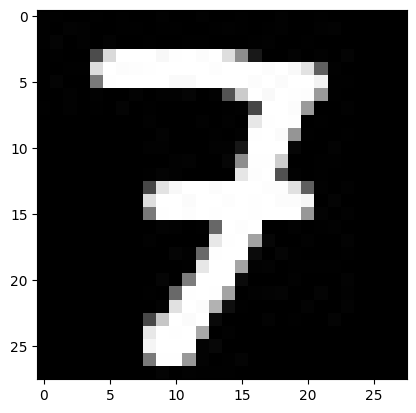

1/1 [==============================] - 0s 31ms/step


(7, 0.99187815)

In [60]:
predict_number('/content/example_img2.jpg')

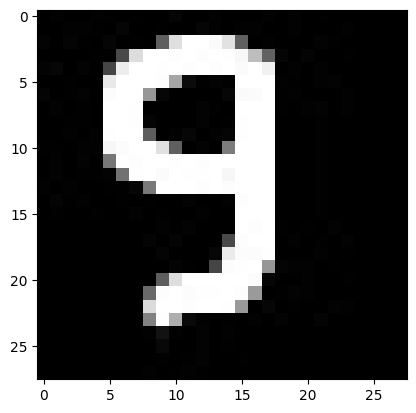

1/1 [==============================] - 0s 59ms/step


(9, 0.6841176)

In [62]:
predict_number('/content/example_img3.jpg')